In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction/Airtel_Data.xlsx',parse_dates=True,index_col='Date')

In [83]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2011-01-03,358.4,364.90,354.50,359.35,360.257123,316463,5263,114008050,82793.0,26.16,10.40,0.95
2011-01-04,361.0,361.75,353.10,355.30,359.347771,510966,3163,183614493,364759.0,71.39,8.65,-5.70
2011-01-05,353.9,355.70,348.35,349.90,351.481252,172421,2552,60602749,43428.0,25.19,7.35,-4.00
2011-01-06,351.0,355.35,351.00,353.25,353.230604,196241,2516,69318327,41231.0,21.01,4.35,2.25
2011-01-07,353.9,354.75,335.00,338.70,342.594042,358515,5778,122825103,73576.0,20.52,19.75,-15.20


In [84]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441,549560.0,59.26,10.40,9.15
2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691,232077.0,46.32,7.85,-5.10
2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610,273203.0,55.30,6.50,-0.50
2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875,479872.0,65.22,4.65,0.25
2021-06-04,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802,398176.0,60.15,4.50,-2.10


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2582 entries, 2011-01-03 to 2021-06-04
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open Price                 2582 non-null   float64
 1   High Price                 2582 non-null   float64
 2   Low Price                  2582 non-null   float64
 3   Close Price                2582 non-null   float64
 4   WAP                        2582 non-null   float64
 5   No.of Shares               2582 non-null   int64  
 6   No. of Trades              2582 non-null   int64  
 7   Total Turnover (Rs.)       2582 non-null   int64  
 8   Deliverable Quantity       2581 non-null   float64
 9   % Deli. Qty to Traded Qty  2581 non-null   float64
 10  Spread High-Low            2582 non-null   float64
 11  Spread Close-Open          2582 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 262.2 KB


<Axes: xlabel='Date'>

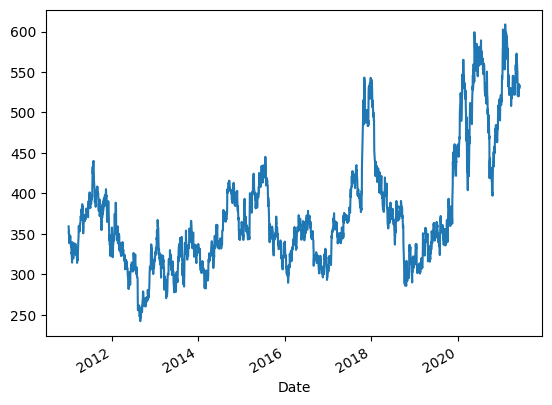

In [86]:
df['Close Price'].plot()

In [87]:
len(df)

2582

In [88]:
airtel_close = df['Close Price']

In [89]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(2582,)

In [90]:
airtel_close = pd.DataFrame(airtel_close)

In [91]:
train = airtel_close.iloc[:2570]
test = airtel_close.iloc[2570:]

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
scaler.fit(train)

MinMaxScaler()

In [95]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [96]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [97]:
test.shape

(12, 1)

In [98]:
length = 12
batch_size = 32
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

In [99]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [100]:
n_features = 1

In [111]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
# fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other
# during training which curbs the individual power of each neuron leading to over-fitting of training data.
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.fit_generator(generator,epochs=10,shuffle=False)
# Generally takes much longer time than ANN
# epochs is the number of iteration for learning


Epoch 1/10


<ipython-input-113-1acd06ee13bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


80/80 [==============================] - 1s 3ms/step - loss: 0.0398
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 6/10
80/80 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 7/10
80/80 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 8/10
80/80 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/10
80/80 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 10/10
80/80 [==============================] - 0s 5ms/step - loss: 0.0030


In [114]:
losses = pd.DataFrame(model.history.history)

<Axes: >

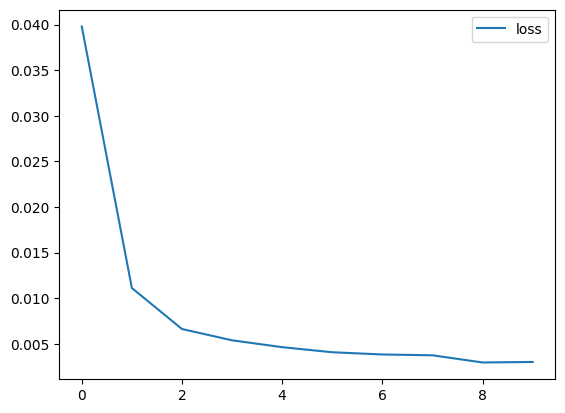

In [115]:
losses.plot()

In [116]:
first_eval_batch = scaled_train[-length:]
# picks last X values in train set

In [117]:
first_eval_batch

array([[0.8633015 ],
       [0.84529332],
       [0.86657572],
       [0.86234652],
       [0.89004093],
       [0.90150068],
       [0.88922237],
       [0.87175989],
       [0.86834925],
       [0.83833561],
       [0.80218281],
       [0.78035471]])

In [118]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [119]:
first_eval_batch

array([[[0.8633015 ],
        [0.84529332],
        [0.86657572],
        [0.86234652],
        [0.89004093],
        [0.90150068],
        [0.88922237],
        [0.87175989],
        [0.86834925],
        [0.83833561],
        [0.80218281],
        [0.78035471]]])

In [120]:
model.predict(first_eval_batch)
# first prediction after train set which is first value of set

1/1 [==============================] - 0s 146ms/step


array([[0.8072012]], dtype=float32)

In [121]:
scaled_test[0]

array([0.75961801])

In [122]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  # Store predictions
  test_predictions.append(current_pred)

  # update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [123]:
test_predictions

[array([0.8072012], dtype=float32),
 array([0.8008871], dtype=float32),
 array([0.7911988], dtype=float32),
 array([0.7940367], dtype=float32),
 array([0.7957414], dtype=float32),
 array([0.793694], dtype=float32),
 array([0.7876268], dtype=float32),
 array([0.79141253], dtype=float32),
 array([0.7843366], dtype=float32),
 array([0.7865435], dtype=float32),
 array([0.78379464], dtype=float32),
 array([0.7880689], dtype=float32)]

In [124]:
true_predictions = scaler.inverse_transform(test_predictions)

In [125]:
true_predictions

array([[538.13924225],
       [535.82512503],
       [532.27435656],
       [533.31444557],
       [533.9392155 ],
       [533.18885808],
       [530.96522327],
       [532.3526931 ],
       [529.75937362],
       [530.56818854],
       [529.56073611],
       [531.12724839]])

In [126]:
test['predictions'] = true_predictions

<ipython-input-126-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [127]:
test

,Close Price,predictions
2570,520.70,538.139242
2571,530.90,535.825125
2572,526.75,532.274357
2573,526.10,533.314446
2574,525.80,533.939215
2575,519.95,533.188858
2576,523.65,530.965223
2577,534.95,532.352693
2578,532.90,529.759374
2579,529.60,530.568189


<Axes: >

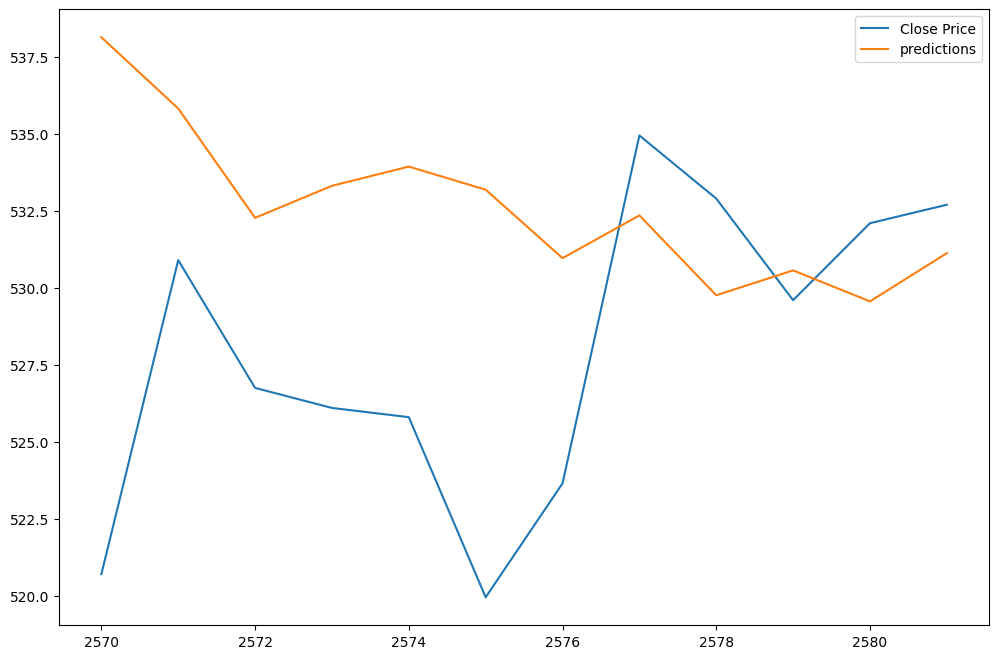

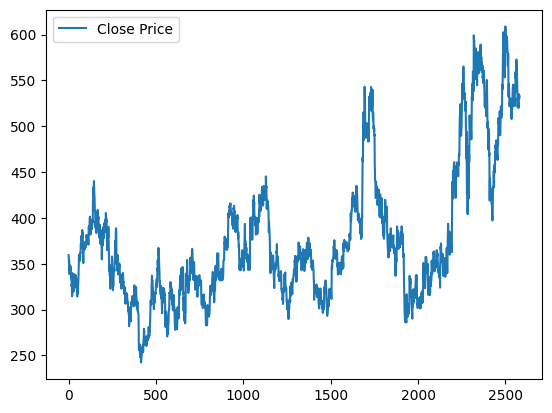

In [128]:
test.plot(figsize=(12,8))
airtel_close.plot()

In [129]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [130]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length, batch_size=32)

In [131]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [132]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


<ipython-input-132-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


81/81 [==============================] - 2s 3ms/step - loss: 0.0214
Epoch 2/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 3/10
81/81 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 4/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 5/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 7/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 10/10
81/81 [==============================] - 0s 3ms/step - loss: 0.0025


<Axes: >

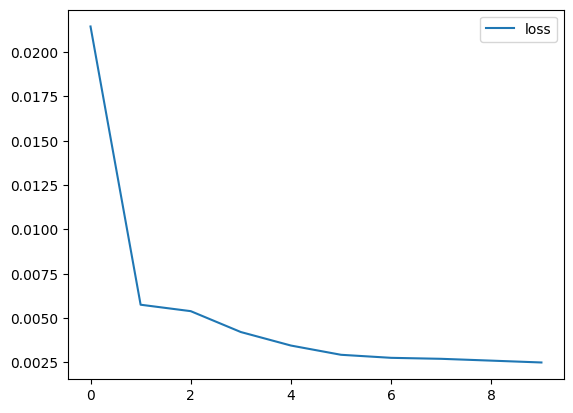

In [133]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [134]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  # Store predictions
  forecast.append(current_pred)

  # update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [135]:
forecast = scaler.inverse_transform(forecast)

In [136]:
forecast

array([[527.51939868],
       [521.58500187],
       [514.61021023],
       [507.3431748 ],
       [503.77394723],
       [500.87999545],
       [496.27976643],
       [492.38994013],
       [490.32793723],
       [487.88198482],
       [484.92708521],
       [480.84414821]])

In [137]:
forecast.flatten()

array([527.51939868, 521.58500187, 514.61021023, 507.3431748 ,
       503.77394723, 500.87999545, 496.27976643, 492.38994013,
       490.32793723, 487.88198482, 484.92708521, 480.84414821])

In [138]:
df_array = np.array(airtel_close)
df_array

array([[359.35],
       [355.3 ],
       [349.9 ],
       ...,
       [529.6 ],
       [532.1 ],
       [532.7 ]])

In [139]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

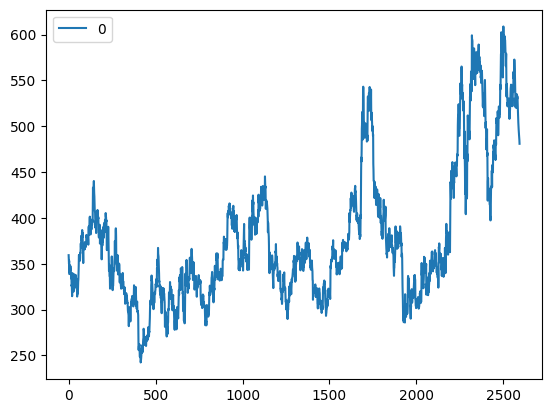

In [140]:
full_data.plot()

In [141]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [142]:
length

12

In [143]:
scaled_test.shape

(12, 1)

In [144]:
length = 11
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                length=length,batch_size=32)

In [145]:
model = Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [150]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)

Epoch 1/20
18/80 [=====>........................] - ETA: 0s - loss: 0.0013

<ipython-input-150-2d944cd6ce67>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


80/80 [==============================] - 1s 7ms/step - loss: 0.0026 - val_loss: 5.6228e-04
Epoch 2/20
80/80 [==============================] - 1s 7ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 0.0026 - val_loss: 6.9787e-04
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 5/20
80/80 [==============================] - 1s 7ms/step - loss: 0.0022 - val_loss: 3.2826e-04
Epoch 6/20
80/80 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 4.1253e-04
Epoch 7/20
80/80 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 8/20
80/80 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 1.1612e-04
Epoch 9/20
80/80 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 2.5822e-04
Epoch 10/20
80/80 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 8.2760e-05
Ep

<Axes: >

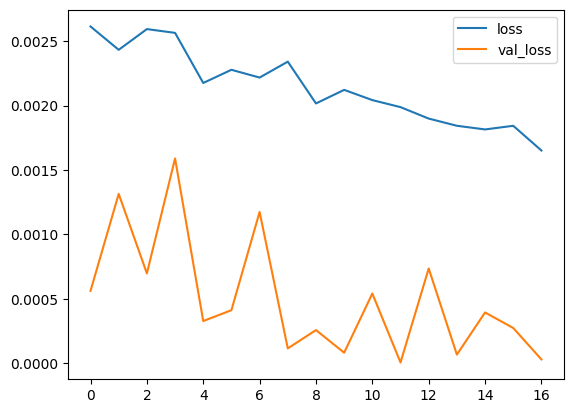

In [151]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [152]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  # Store predictions
  test_predictions.append(current_pred)

  # update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


<ipython-input-153-ad9c58e111aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions']=true_predictions


<Axes: >

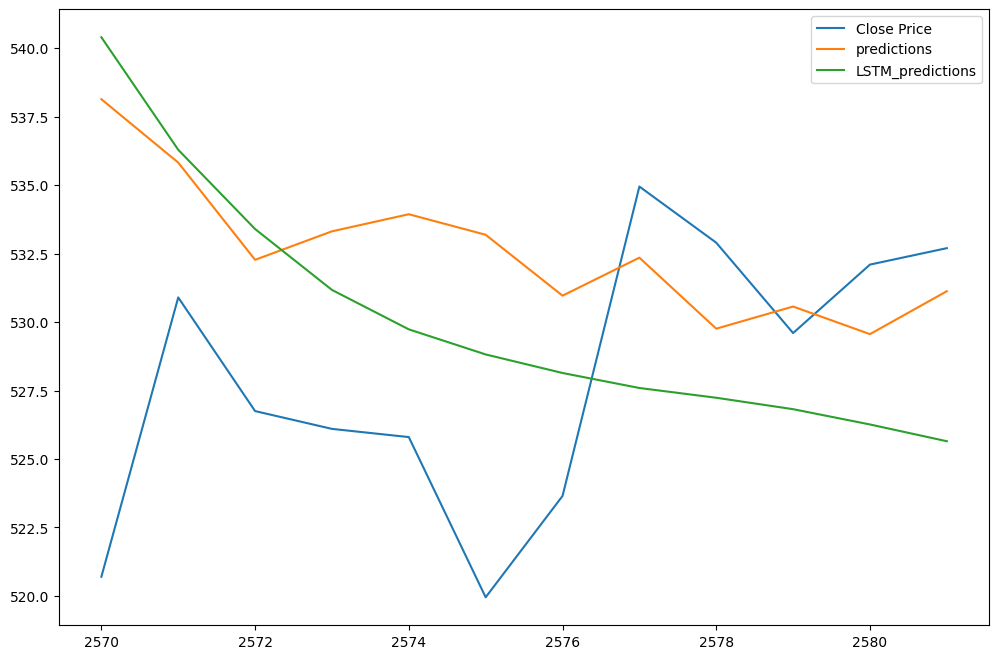

In [153]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions']=true_predictions
test.plot(figsize=(12,8))

In [155]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(11):

  current_pred = model.predict(current_batch)[0]

  # Store predictions
  forecast.append(current_pred)

  # update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [156]:
forecast = scaler.inverse_transform(forecast)

In [157]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

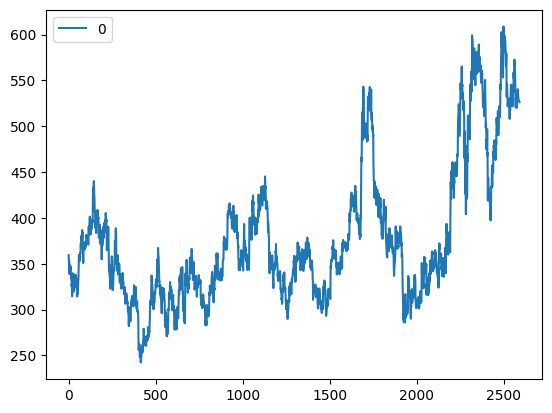

In [158]:
full_data.plot();

In [159]:
forecast

array([[540.40163027],
       [536.29348402],
       [533.39896427],
       [531.17473965],
       [529.73466681],
       [528.81874536],
       [528.14115398],
       [527.59306036],
       [527.23672305],
       [526.81926315],
       [526.26142662]])

In [162]:
full_data.tail(20)

,0
2573,526.100000
2574,525.800000
2575,519.950000
2576,523.650000
2577,534.950000
2578,532.900000
2579,529.600000
2580,532.100000
2581,532.700000
2582,540.401630
